# **1. NAVER 지식인**

## **Import Modules**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install konlpy

In [19]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import urllib.request 
import urllib.parse

from tqdm import tqdm_notebook
import time

## **Test Crawling for Keyword : 코로나, 감정**

In [15]:
base_url = "https://kin.naver.com/search/list.naver?query="
search = input("검색어를 입력하세요 : ")
url = base_url + urllib.parse.quote_plus(search)      # quote_plus : encoding

검색어를 입력하세요 : 코로나, 감정


In [13]:
url

'https://kin.naver.com/search/list.naver?query=%EC%BD%94%EB%A1%9C%EB%82%98%2C+%EA%B0%90%EC%A0%95'

In [17]:
html = urllib.request.urlopen(url).read()    # 해당 url 읽은 결과
soup = BeautifulSoup(html, "html.parser")
titles = soup.find_all('dt')

title_list = []
for t in titles:
    title_list.append(t.text)

In [18]:
title_list

['\n코로나 백신맞고 이틀 지났는데 감정이... \n',
 '\n코로나 지역 감정\n',
 '\n코로나 자가격리자 지원금 신청관련\n',
 '\n코로나 마스크 관련 부당 해고 걱정\n\n',
 '\n코로나 백신접종후 우울증?\n\n',
 '\n코로나 확진자 모욕 고소 질문\n\n',
 '\n코로나 블루, 코로나 레드 이것이 뭐\n',
 '\n코로나 확진자 방문 숨길시에 받는 처벌\n\n',
 '\n코로나 백신\n',
 '\n백신부작용에 감정기복이 심한것도 있나요\n']

In [ ]:
# Xpath
//*[@id="s_content"]/div[3]/ul/li[2]/dl/dt
//*[@id="s_content"]/div[3]/ul/li[1]/dl/dt
//*[@id="s_content"]/div[3]/ul/li[1]/dl/dd[2]

## **Crawling**

In [ ]:
https://kin.naver.com/search/list.naver?query=%EC%BD%94%EB%A1%9C%EB%82%98%2C%20%EA%B0%90%EC%A0%95&page=2

https://kin.naver.com/search/list.naver?query=%EC%BD%94%EB%A1%9C%EB%82%98%2C%20%EA%B0%90%EC%A0%95&page=3


### **1. 키워드 검색 결과 리스트에 저장하기**
  - **tqdm_notebook** : for 문 진행상황 표시

In [22]:
from tqdm import tqdm_notebook
import time

In [ ]:
https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query=%EC%BD%94%EB%A1%9C%EB%82%98%2C+%EA%B0%90%EC%A0%95&c_id=&c_name=&sm=tab_pge&kin_start=1&kin_age=0

https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query=%EC%BD%94%EB%A1%9C%EB%82%98%2C+%EA%B0%90%EC%A0%95&c_id=&c_name=&sm=tab_pge&kin_start=11&kin_age=0

https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query=%EC%BD%94%EB%A1%9C%EB%82%98%2C+%EA%B0%90%EC%A0%95&c_id=&c_name=&sm=tab_pge&kin_start=41&kin_age=0

#### **저장 내용 : 지식in 검색 페이지에서 노출되는 내용**
<br/>
<img src="https://user-images.githubusercontent.com/92680829/140994219-94ca46ee-c11e-4c28-b369-8ab42ff1c939.png" width="600px"/>
<br/>
<br/>

In [157]:
base_url = "https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query={input}&c_id=&c_name=&sm=tab_pge&kin_start={i}&kin_age=0"
contents = []
for i in tqdm_notebook(range(1, 5000+1, 10)):
    search_url = urllib.request.urlopen(base_url.format(input=urllib.parse.quote_plus("코로나 & 감정"), i=i))
    soup = BeautifulSoup(search_url, 'html.parser')
    tmp = soup.find_all(class_="question_group")

    for line in tmp:
        contents.append(line.text)
    time.sleep(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/500 [00:00<?, ?it/s]

In [158]:
len(contents)

5000

### **2. 마이닝한 텍스트 중 원하는 형태소만 추출 with Twitter**
- 명사, 형용사, 부사 등 의미가 있는 요소만 선택
- 추출된 단어들 중 불필요한 어미 제거
- 추출된 단어들 중 길이가 1음절인 것은 제외

In [159]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

In [160]:
twt = Twitter()   
word_list = contents

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [161]:
morphs = []
for sentence in word_list:
    morph = twt.pos(sentence)
    morphs.append(morph)

In [162]:
morphs[:1]

[[('코로나', 'Noun'),
  ('백신', 'Noun'),
  ('맞고', 'Verb'),
  ('이틀', 'Noun'),
  ('지났는데', 'Verb'),
  ('감정', 'Noun'),
  ('이', 'Josa'),
  ('이상해요', 'Adjective'),
  ('...', 'Punctuation'),
  ('지금', 'Noun'),
  ('백신', 'Noun'),
  ('맞은지', 'Verb'),
  ('이틀', 'Noun'),
  ('지났는데', 'Verb'),
  ('감정', 'Noun'),
  ('이', 'Josa'),
  ('심각할', 'Adjective'),
  ('정도', 'Noun'),
  ('로', 'Josa'),
  ('변하는', 'Adjective'),
  ('것', 'Noun'),
  ('같아요', 'Adjective'),
  ('.', 'Punctuation'),
  ('단순히', 'Adjective'),
  ('우울한게', 'Adjective'),
  ('아니에요', 'Adjective'),
  ('정말', 'Noun'),
  ('계속', 'Noun'),
  ('해서', 'Verb'),
  ('울컥', 'Adverb'),
  ('하고', 'Verb'),
  ('눈물', 'Noun'),
  ('이나', 'Noun'),
  ('요', 'Josa'),
  ('가만히', 'Adverb'),
  ('있기만', 'Adjective'),
  ('해도', 'Noun'),
  ('눈물', 'Noun'),
  ('이', 'Josa'),
  ('흘러요', 'Verb'),
  ('평소', 'Noun'),
  ('에', 'Josa'),
  ('이렇게', 'Adverb'),
  ('우울한', 'Adjective'),
  ('적', 'Noun'),
  ('이', 'Josa'),
  ('한번', 'Noun'),
  ('도', 'Josa'),
  ('없었어요', 'Adjective'),
  ('.', 'Punctuation'),
  ('이', 'De

In [208]:
words = []
remove = ["없었어요", "었어요", "한번", "적", "것", "한", "하게", "한게", "해요", "합니다",\
          "하여", "해서", "했습니다", "하나요", "할까요", "해가지고", "하니까", "하다고", "했는데"\
          "하면", "할까요", "하고", "했어요", "져서요", "집니다", "납니다", "하지만", "지만",\
          "할", "한걸까요", "까요", "입니다", "어떻게", "없어서", "그래서", "그런데", "그런", "근데", "같이",\
          "가끔", "너무", "때문", "때문에", "자꾸", "있을", "있는", "요즘", "약간", "영어",\
          "이런", "왜", "이럴까요", "저희", "우리", "많이", "계속", "다시", "이틀", "지금", "코로나", "백신",\
          "그냥", "부터", "승무원", '해도', "언젠가", "있으면", "시어머니", "아버님", "통장", "있고", "문장",\
          "현재", "치매", "해도", "있으면", "있고", "감정"]
for sentence in morphs:
    for elem in sentence:
      if elem[1] in ["Noun", "Adjective", "Adverb"]:
          tmp = elem[0]
          for r in remove:
              tmp = tmp.replace(r, "")
          words.append(tmp)

In [168]:
words[:10]

['', '', '', '감정', '이상', '', '', '', '감정', '심각']

In [209]:
words2 = [x for x in words if len(x) > 1]

In [175]:
len(words2)

92431

### **3. 빈도수 계산해서 WordCloud 만들기**

In [211]:
counter = Counter(words2)
freqs = counter.most_common(400)
freqs[:10]

[('친구', 1636),
 ('우울증', 1065),
 ('엄마', 1026),
 ('사춘기', 1000),
 ('생각', 997),
 ('기복', 796),
 ('우울', 736),
 ('기초', 708),
 ('증상', 619),
 ('등급', 562)]

#### **Matplotlib 에서 한글폰트 사용**

In [177]:
!apt -qq -y install fonts-nanum > /dev/null

In [178]:
import matplotlib.font_manager as fm
fontpath="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath)

#### **WordCloud 모양 변경**

In [204]:
from wordcloud import ImageColorGenerator
from PIL import Image

mask = np.array(Image.open('/content/cloud2.jpg'))
colors = ImageColorGenerator(mask)

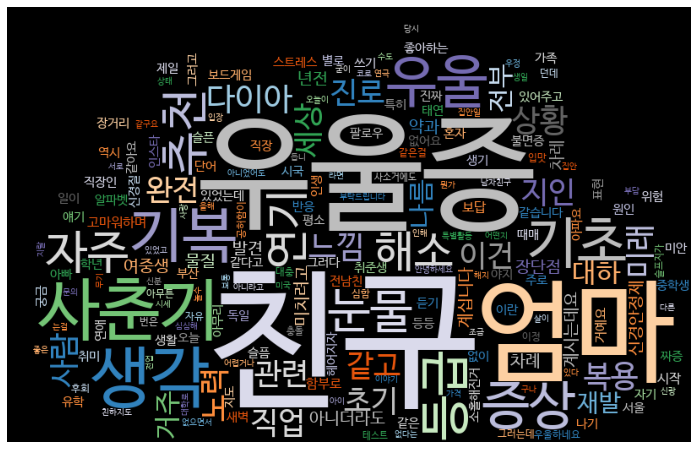

In [223]:
stopwords = ["기초", "같고", "자주"]
wordcloud = WordCloud(font_path=fontpath, 
                      background_color="black",
                      relative_scaling=0.5,
                      colormap='tab20c',
                      mask = mask,
                      stopwords=stopwords,
                      contour_color='black',
                      )
cloud = wordcloud.generate_from_frequencies(dict(freqs))
plt.figure(figsize=(25, 8))
plt.axis("off")
plt.imshow(cloud)
plt.show()

## **Freqs to Excel**

In [235]:
freqs_500 = counter.most_common(500)
freq_df_naver = pd.DataFrame(freqs_500, columns={"단어", "빈도수"})
freq_df_naver = freq_df_naver.set_index(freq_df_naver["단어"]).drop("단어", axis=1)
freq_df_naver

,빈도수
단어,
친구,1636
우울증,1065
엄마,1026
사춘기,1000
생각,997
...,...
분위기,11
없습니다,11
운동,11


In [236]:
freq_df_naver.to_excel("freq_naver.xlsx")